https://www.sciencedirect.com/science/article/pii/S0898122112001745#br000150

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import math
import numpy as np
import seaborn as sns

# 1. Importing the dataset

## Data Sources:

The data is stored in data directory, containing 7 files as mentioned below:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming. See: https://psl.noaa.gov/data/timeseries/AMO/
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland, see: https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
 - spot_num.txt: The number of sun spots, see http://www.sidc.be/silso/datafiles
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979, see: https://www.cpc.ncep.noaa.gov/data/indices/sstoi.indices
 - temp.csv: global average temperature by year, see: https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
 - volcano.csv: volcanic activities, see:

 - amo.txt: This data series represents the mean SST of North Atlantic, i.e., within the latitude 0 °–70 °N, detrended to remove the influence of global warming
 - co2.txt: The long-time yearly time series of the concentration of co2
 - nao.txt: An index calculated from the measurements of air pressure at two locations: Ponta Delgada, Azores, and Stykkisholmur/Reykjavik in Iceland
 - spot_num.txt: The number of sun spots
 - sstenso.txt: Temperature fluctuations expressed by the average SST anomaly of the region 20 °N–20 °S minus 90 °N–20 °N and 20 °S–90 °S, relative to the base period 1950–1979
 - temp.csv: global average temperature by year
 - volcano.csv: volcanic activities

## Read temperature data

<AxesSubplot:xlabel='date'>

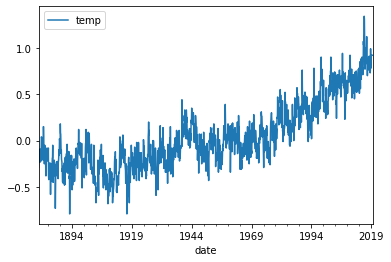

In [2]:
df_temp = pd.read_csv("data/global_surface_temperature_anomalies.csv")
df_temp['date'] = pd.to_datetime(df_temp['date'])
#df_temp.set_index('date', inplace=True)
df_temp["year"] = df_temp.date.dt.year
df_temp["month"] = df_temp.date.dt.month
df_temp['date'] = pd.to_datetime(df_temp['year'].astype(str) + '-' + df_temp['month'].astype(str))
df_temp.set_index('date', inplace=True)
df_temp = df_temp.rename(columns={"Avg_Anomaly_deg_C":"temp"})
df_temp = df_temp[["temp"]]
df_temp.dropna()
df_temp.plot()

## Read AMO data

C:\Users\Dylan\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



<AxesSubplot:xlabel='date'>

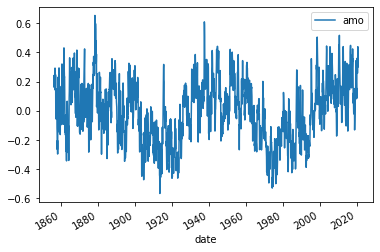

In [3]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_amo = pd.read_csv("data/amo.txt",sep="   ",index_col=0, names = col_month) # 3 spaces
df_amo.reset_index(inplace=True)
df_amo.rename(columns={'index': 'year'}, inplace=True)
df_amo = df_amo.melt(id_vars='year', var_name='month')
df_amo['date'] = pd.to_datetime(df_amo['year'].astype(str) + '-' + df_amo['month'])
df_amo.set_index('date', inplace=True)
df_amo["value"] = pd.to_numeric(df_amo["value"],errors="coerce")
df_amo = df_amo.rename(columns={"value":"amo"})
df_amo = df_amo[["amo"]]
df_amo.dropna()
df_amo.sort_index()
df_amo.plot()

## Read CO2 data

<AxesSubplot:xlabel='date'>

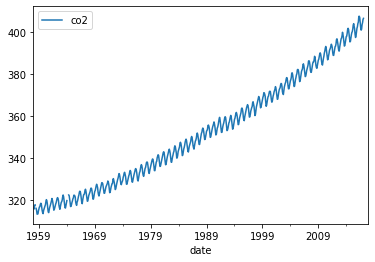

In [4]:
df_co2 = pd.read_csv("data/co2.csv")
df_co2["date"] = pd.to_datetime(df_co2["Year"].astype(str) + "-" + df_co2["Month"].astype(str))
df_co2.set_index("date", inplace=True)
df_co2 = df_co2.rename(columns={"Carbon Dioxide (ppm)":"co2"})
df_co2.co2 = pd.to_numeric(df_co2.co2)
df_co2 = df_co2[["co2"]]
df_co2.dropna()
df_co2.plot()

## Read NAO data

C:\Users\Dylan\anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



<AxesSubplot:xlabel='date'>

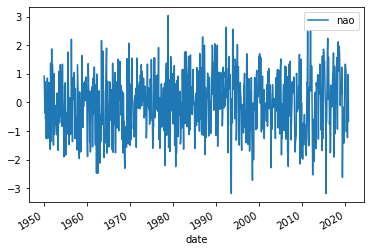

In [5]:
col_month = "Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec".split(" ")
df_nao = pd.read_csv("data/nao.txt",sep="  ",index_col=0, names = col_month) # 2 spaces
df_nao.reset_index(inplace=True)
df_nao.rename(columns={'index': 'year'}, inplace=True)
df_nao = df_nao.melt(id_vars='year', var_name='month')
df_nao['date'] = pd.to_datetime(df_nao['year'].astype(str) + '-' + df_nao['month'])
df_nao.set_index('date', inplace=True)
df_nao["value"] = pd.to_numeric(df_nao["value"],errors="coerce")
df_nao = df_nao.rename(columns={"value":"nao"})
df_nao = df_nao[["nao"]]
df_nao.dropna()
df_nao.sort_index()
df_nao.plot()

## Read Sun Spot Data

<AxesSubplot:xlabel='date'>

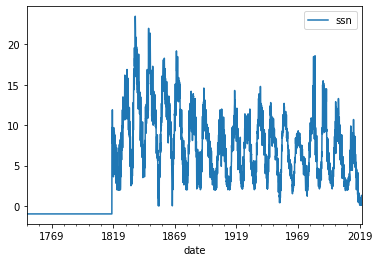

In [6]:
df_ssn = pd.read_csv("data/SN_m_tot_V2.0.csv",sep=";", index_col=2,names=["YEAR","MON","ir1","ssn","ir2","ir3"])
df_ssn["date"] = pd.to_datetime(df_ssn.YEAR.astype("str")+'-'+df_ssn.MON.astype(str))
df_ssn.set_index('date', inplace=True)
df_ssn.rename(columns={'SSN': 'ssn'}, inplace=True)
df_ssn["ssn"] = pd.to_numeric(df_ssn["ssn"],errors="coerce")
df_ssn = df_ssn[["ssn"]]
df_ssn.plot()

## Read ENSO data

<AxesSubplot:xlabel='date'>

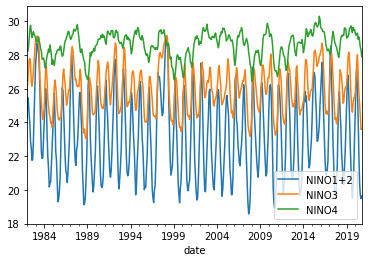

In [7]:
df_enso = pd.read_csv("data/sstenso.txt",sep=" ")

df_enso["date"] = pd.to_datetime(df_enso.YR.astype("str")+'-'+df_enso.MON.astype(str))
df_enso.set_index('date', inplace=True)
df_enso = df_enso[["NINO1+2","NINO3","NINO4"]]
df_enso[["NINO1+2","NINO3","NINO4"]] = df_enso[["NINO1+2","NINO3","NINO4"]].apply(pd.to_numeric,errors="coerce")
df_enso.plot()

## Read Volcanic data

<AxesSubplot:xlabel='date'>

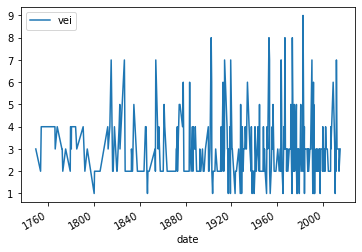

In [8]:
df_vol = pd.read_csv("data/volcano.csv",sep=";")
df_vol = df_vol[~df_vol["Month"].isna()]
df_vol = df_vol[df_vol["Year"]>=1749]

df_vol = df_vol[df_vol["Volcano Explosivity Index (VEI)"] > 0]
df_vol = df_vol.rename(columns={"Volcano Explosivity Index (VEI)":"vei"})
# df_vol["date"] = pd.to_datetime(df_vol.Year.astype(str)+'-'+df_vol.Month.astype(int).astype(str),errors="coerce")
df_vol_group = df_vol.groupby(["Year", "Month"])["vei"].sum().reset_index()
df_vol_group["date"] = pd.to_datetime(df_vol_group.Year.astype(str)+'-'+df_vol_group.Month.astype(int).astype(str))
df_vol_group.set_index("date",inplace=True)
df_vol_group = df_vol_group[["vei"]]
df_vol_group.plot()

# Merge Data

In [9]:
df = df_temp.join(df_amo,how="outer")
df = df.join(df_co2,how="outer")
df = df.join(df_enso,how="outer")
df = df.join(df_nao,how="outer")
df = df.join(df_vol_group,how="outer")
df = df.join(df_ssn,how="outer")
df


,temp,amo,co2,NINO1+2,NINO3,NINO4,nao,vei,ssn
date,,,,,,,,,
1749-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
1749-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
...,...,...,...,...,...,...,...,...,...
2020-08-01,NaN,0.438,NaN,19.69,24.42,28.47,0.12,NaN,1.3
2020-09-01,NaN,0.309,NaN,19.48,23.58,28.29,0.98,NaN,0.3
2020-10-01,NaN,0.301,NaN,19.63,23.62,27.89,-0.65,NaN,1.2


In [10]:
#reload_data = False

#data_store = pd.HDFStore('data/processed_data.h5')
#if reload_data:
#    data_store['df'] = df
#else:
#    df = data_store['df']
#data_store.close()


<AxesSubplot:>

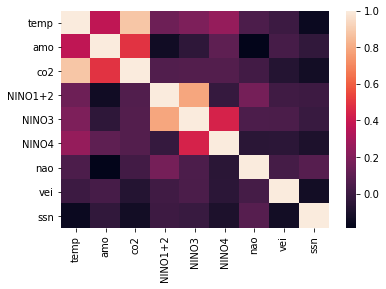

In [11]:
sns.heatmap(df.corr())

# Testing FBprophet

In [12]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy.rename(columns={"date":"ds","temp":"y"})
df_copy = df_copy[df_copy.ds >= "1984-01-01"]
df_copy["vei"] = df_copy["vei"].fillna(0)
# predict the last 10 years
df_copy.dropna(inplace=True)
df_train = df_copy.loc[df_copy["ds"]<"2010-01-01"]
df_test  = df_copy.loc[df_copy["ds"]>="2010-01-01"]


<AxesSubplot:>

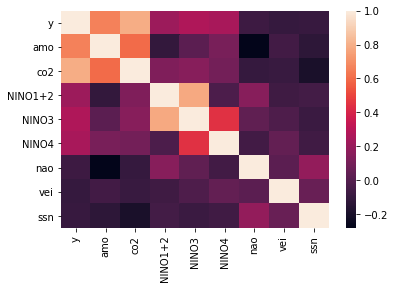

In [13]:
sns.heatmap(df_copy.corr())

In [14]:
# https://github.com/facebook/prophet/issues/792
from fbprophet import Prophet
from dateutil.easter import easter
m = Prophet()
m.add_regressor("amo")
m.add_regressor("co2")
m.add_regressor("NINO1+2")
m.add_regressor("NINO3")
m.add_regressor("NINO4")
m.add_regressor("nao")
m.add_regressor("vei")
m.fit(df_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Dylan\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [15]:
forecast = m.predict(df_test.drop(columns="y"))


C:\Users\Dylan\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.

C:\Users\Dylan\anaconda3\envs\machine_learning\lib\site-packages\fbprophet\forecaster.py:400: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
def evaluate(y_pred,y_true):
    errors = abs(y_pred - y_true)
    print('Model Performance')
    print('RMSE: {:0.6f}'.format(mean_squared_error(y_pred, y_true)))
    print('MAE: {:0.6f}'.format(mean_absolute_error(y_pred, y_true)))
    print("Pearson correlation: {:0.6f}".format(pearsonr(y_pred,y_true)[0]))
    print("Correlation coefficient: {:0.6f}".format(abs(1 - pearsonr(y_pred,y_true)[0])))


evaluate(forecast.yhat,df_test.y)

Model Performance
RMSE: 0.014254
MAE: 0.091908
Pearson correlation: 0.795611
Correlation coefficient: 0.204389


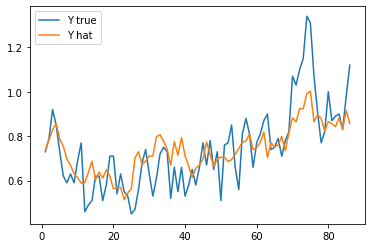

In [17]:
x = np.arange(1,87)
plt.plot(x, df_test.y)
plt.plot(x, forecast.yhat)
plt.legend(["Y true","Y hat"])
plt.show()

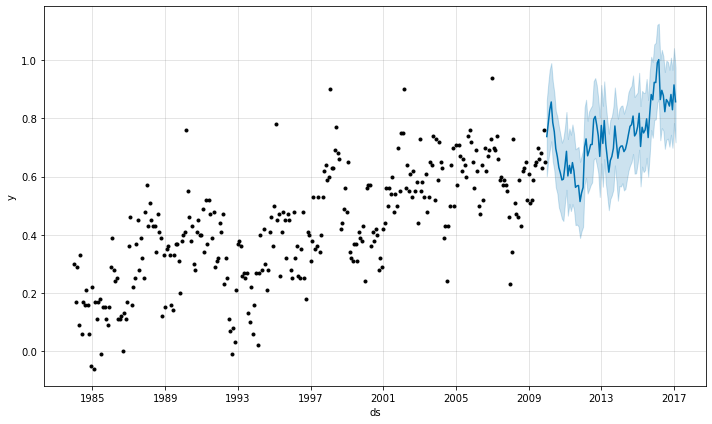

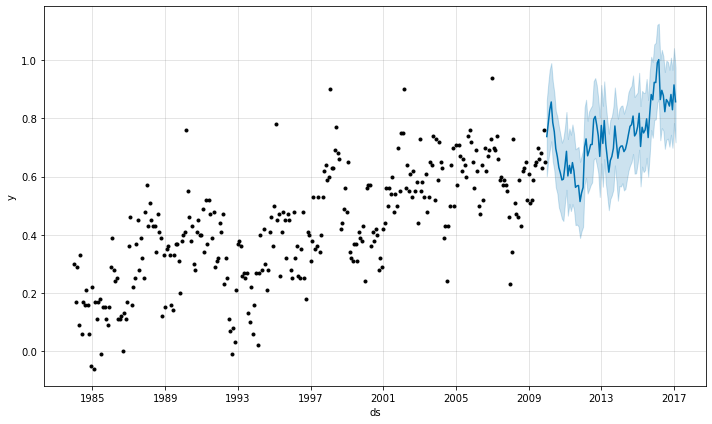

In [18]:
m.plot(forecast)